In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import random

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customer sentimental/10 Amazon Final Data with Label (1).csv')
df

,Unnamed: 0.1,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label
0,0,0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",Positive
1,1,1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",Positive
2,2,2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",Positive
3,3,3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",Positive
4,4,4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",Positive
5,5,5,APX47D16JOP7H,120401325X,RLH,"[1, 2]",Bad Person,3,Cute,1381536000,"10 12, 2013",Negative
6,6,6,A1JVVYYO7G56DS,120401325X,Tyler Evans,"[0, 0]",Bad Lemon,5,best thing ever..,1377129600,"08 22, 2013",Negative
7,7,7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,"[1, 2]",Bad Mobile,1,not a good Idea,1384992000,"11 21, 2013",Negative
8,8,8,A2JWEDW5FSVB0F,3998899561,Adam,"[2, 3]",Bad application,5,Solid Case,1380067200,"09 25, 2013",Negative
9,9,9,A8AJS1DW7L3JJ,3998899561,Agata Majchrzak,"[1, 1]",Bad Girl,5,Perfect Case,1396483200,"04 3, 2014",Negative


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
label             0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df = df['reviewText']

In [ ]:
df = pd.DataFrame(df, columns = ['reviewText'])

In [ ]:
x = df1.label

In [ ]:
x = pd.DataFrame(x, columns = ['label'])

In [ ]:
df = pd.concat([df,x],1)

In [ ]:
df


,reviewText,label
0,They look good and stick good! I just don't li...,Positive
1,These stickers work like the review says they ...,Positive
2,These are awesome and make my phone look so st...,Positive
3,Item arrived in great time and was in perfect ...,Positive
4,"awesome! stays on, and looks great. can be use...",Positive
5,Bad Person,Negative
6,Bad Lemon,Negative
7,Bad Mobile,Negative
8,Bad application,Negative
9,Bad Girl,Negative


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Download the 'stopwords' resource
nltk.download('stopwords')

# Download the 'wordnet' resource for lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['reviewText'] = df['reviewText'].str.lower()

In [ ]:
import re

In [ ]:
def remove_html_tags(text):
    if isinstance(text, str):
        pattern = re.compile('<.*?>')           #?ISinstance
        return pattern.sub(r'', text)
    else:
        return text

In [ ]:
df['reviewText'] = df['reviewText'].apply(remove_html_tags)

In [ ]:
def remove_url(text):
    if isinstance(text, str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'', text)
    else:
        return text

In [ ]:
df['reviewText'] = df['reviewText'].apply(remove_url)

In [ ]:
import string

In [ ]:
import time

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    if isinstance(text, str):
        for char in exclude:
            text = text.replace(char, '')
        return text
    else:
        return str(text)

In [ ]:
df['reviewText'] = df['reviewText'].apply(remove_punc)

In [ ]:
def DataPrep(text):
    if not isinstance(text, (str, bytes)):
        # Handle non-string or non-bytes-like objects here
        return text  # or return some default value, or raise an exception

    # Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)

    # Other data preparation steps
    text = re.sub(r'\d+', '', text)  # numbers
    text = re.sub(r'[^\w\s]', '', text)  # special characters

    # tokenization
    tokens = nltk.word_tokenize(text)

    # remove puncs
    punc = list(punctuation)
    words = [word for word in tokens if word not in punc]

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if not word in stop_words]

    # lemmatization
    words = [lemma.lemmatize(word) for word in words]

    text = ' '.join(words)

    return text

In [ ]:
df['reviewText'] = df['reviewText'].apply(DataPrep)

In [ ]:
df

,reviewText,label
0,look good stick good dont like rounded shape a...,Positive
1,sticker work like review say stick great stay ...,Positive
2,awesome make phone look stylish used one far a...,Positive
3,item arrived great time perfect condition howe...,Positive
4,awesome stay look great used multiple apple pr...,Positive
5,bad person,Negative
6,bad lemon,Negative
7,bad mobile,Negative
8,bad application,Negative
9,bad girl,Negative


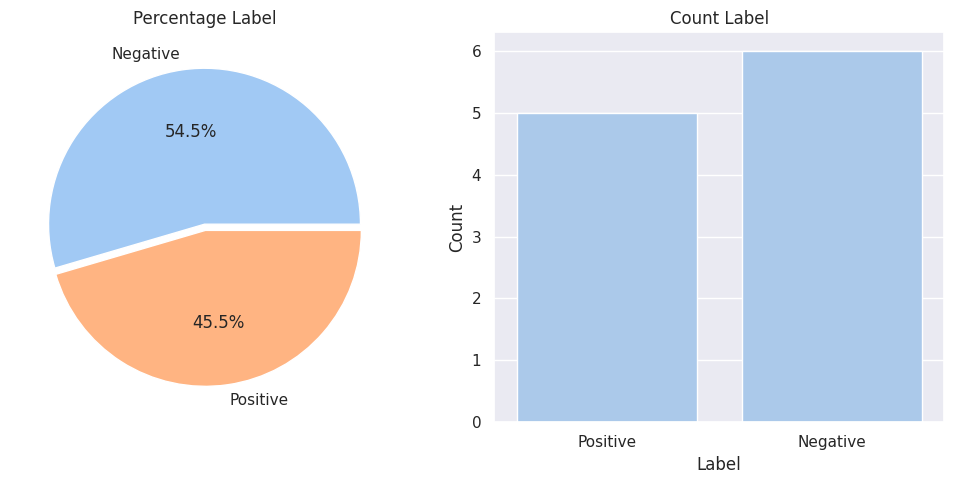

In [ ]:
label_count = df['label'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

sns.countplot(x = df['label'] , ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
!pip install flair

  Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.0
    Uninstalling urllib3-2.2.0:
      Successfully uninstalled urllib3-2.2.0


In [ ]:
pip install --upgrade urllib3

  Using cached urllib3-2.2.0-py3-none-any.whl (120 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.34.39 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 2.2.0 which is incompatible.
flair 0.13.1 requires urllib3<2.0.0,>=1.0.0, but you have urllib3 2.2.0 which is incompatible.


In [ ]:
import flair

In [ ]:
dir(flair)

['Path',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_arrow',
 'cache_root',
 'data',
 'datasets',
 'device',
 'embeddings',
 'file_utils',
 'hf_set_seed',
 'logger',
 'logging',
 'models',
 'nn',
 'optim',
 'os',
 'samplers',
 'set_proxies',
 'set_seed',
 'splitter',
 'tokenization',
 'torch',
 'trainers',
 'training_utils',
 'visual']

In [ ]:
# pip install --upgrade urllib3

In [ ]:
df.head()

,reviewText,label
0,look good stick good dont like rounded shape a...,Positive
1,sticker work like review say stick great stay ...,Positive
2,awesome make phone look stylish used one far a...,Positive
3,item arrived great time perfect condition howe...,Positive
4,awesome stay look great used multiple apple pr...,Positive


In [ ]:
df1 = df[['reviewText','label']]

In [ ]:
df1.columns = ['text','labels']

In [ ]:
df1

,text,labels
0,look good stick good dont like rounded shape a...,Positive
1,sticker work like review say stick great stay ...,Positive
2,awesome make phone look stylish used one far a...,Positive
3,item arrived great time perfect condition howe...,Positive
4,awesome stay look great used multiple apple pr...,Positive
5,bad person,Negative
6,bad lemon,Negative
7,bad mobile,Negative
8,bad application,Negative
9,bad girl,Negative


In [ ]:
# Prepare for FastText Format
# _label__a<class><text>

In [ ]:
df_fst = df1.copy()

In [ ]:
df_fst.head()

,text,labels
0,look good stick good dont like rounded shape a...,Positive
1,sticker work like review say stick great stay ...,Positive
2,awesome make phone look stylish used one far a...,Positive
3,item arrived great time perfect condition howe...,Positive
4,awesome stay look great used multiple apple pr...,Positive


In [ ]:
'__lable__' + df_fst['labels'].astype(str)

0     __lable__Positive
1     __lable__Positive
2     __lable__Positive
3     __lable__Positive
4     __lable__Positive
5     __lable__Negative
6     __lable__Negative
7     __lable__Negative
8     __lable__Negative
9     __lable__Negative
10    __lable__Negative
Name: labels, dtype: object

In [ ]:
df_fst['labels'] = '__lable__' + df_fst['labels'].astype(str)

In [ ]:
df_fst = df_fst[['labels','text']]

In [ ]:
#spliting Dataset into 3
#train,test,dev.csv
#60,20,30

In [ ]:
split_1 = int(0.6 * len(df1))
split_2 = int(0.8 * len(df1))

# Split the DataFrame
train = df1.iloc[:split_1]
test = df1.iloc[split_1:split_2]
dev = df1.iloc[split_2:]

In [ ]:
df1.shape,train.shape,test.shape,dev.shape

((11, 2), (6, 2), (2, 2), (3, 2))

In [ ]:
#Create A folder fo the csv
!mkdir -p data

In [ ]:
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)
dev.to_csv('data/dev.csv',index=False)

In [ ]:
!ls data

best-model.pt  dev.tsv	       loss.tsv  test.tsv   training.log
dev.csv        final-model.pt  test.csv  train.csv


In [ ]:
df_fst

,labels,text
0,__lable__Positive,look good stick good dont like rounded shape a...
1,__lable__Positive,sticker work like review say stick great stay ...
2,__lable__Positive,awesome make phone look stylish used one far a...
3,__lable__Positive,item arrived great time perfect condition howe...
4,__lable__Positive,awesome stay look great used multiple apple pr...
5,__lable__Negative,bad person
6,__lable__Negative,bad lemon
7,__lable__Negative,bad mobile
8,__lable__Negative,bad application
9,__lable__Negative,bad girl


In [ ]:
#spliting fastext format dataset into 3
split_1 = int(0.6 * len(df_fst))
split_2 = int(0.8 * len(df_fst))

# Split the DataFrame
train_fst = df_fst.iloc[:split_1]
test_fst = df_fst.iloc[split_1:split_2]
dev_fst = df_fst.iloc[split_2:]

In [ ]:
#Store in a folder
!mkdir -p data_fst

In [ ]:
train_fst.to_csv('data_fst/train.csv',index=False)
test_fst.to_csv('data_fst/test.csv',index=False)
dev_fst.to_csv('data_fst/dev.csv',index=False)

In [ ]:
!ls data_fst

dev.csv  test.csv  train.csv


In [ ]:
#Building our corpus
#CSVClassificationCorpus
#ClassificationCorpus

In [ ]:
from flair.datasets import ClassificationCorpus,CSVClassificationCorpus
from flair.data import Corpus

In [ ]:
#For CSV
df1.columns

Index(['text', 'labels'], dtype='object')

In [ ]:
#Create Column Mapping
column_name_map = {0: 'text', 1: 'labels'}

In [ ]:
#Location for CSV
data_folder = 'data/'

In [ ]:
label_type = 'labels'

In [ ]:
pd.read_csv('/content/data_fst/test.csv')

,labels,text
0,__lable__Negative,bad lemon
1,__lable__Negative,bad mobile


In [ ]:
# #Create Corpus For CSV
Corpus_csv: Corpus = CSVClassificationCorpus(data_folder= data_folder,column_name_map = column_name_map,label_type=label_type,skip_header=True,delimiter=',')

2024-02-10 12:42:48,841 Reading data from data
2024-02-10 12:42:48,845 Train: data/train.csv
2024-02-10 12:42:48,849 Dev: data/dev.csv
2024-02-10 12:42:48,851 Test: data/test.csv


In [ ]:
df_fst.columns

Index(['labels', 'text'], dtype='object')

In [ ]:
#Create Column Mapping
column_name_map = {1:'label_topic',0:'text'}

In [ ]:
label_type = 'labels'

In [ ]:
#Method 2 Using FastText Formate
data_folder_fst = 'data_fst/'

In [ ]:
#Create Corpus For CSV
Corpus_fst: Corpus = CSVClassificationCorpus(data_folder= data_folder_fst,column_name_map = column_name_map,label_type=label_type,skip_header=True,delimiter=',')

2024-02-10 12:42:49,027 Reading data from data_fst
2024-02-10 12:42:49,032 Train: data_fst/train.csv
2024-02-10 12:42:49,035 Dev: data_fst/dev.csv
2024-02-10 12:42:49,037 Test: data_fst/test.csv


In [ ]:
label_type = 'labels'

In [ ]:
#Creating the Label Diction for csv
label_dict_csv = Corpus_csv.make_label_dictionary(label_type = label_type)

2024-02-10 12:42:49,088 Computing label dictionary. Progress:


0it [00:00, ?it/s]
6it [00:00, 821.82it/s]

2024-02-10 12:42:49,160 Dictionary created for label 'labels' with 2 values: Positive (seen 5 times), Negative (seen 1 times)


In [ ]:
#Creating the Label Dcition for FastText
label_dict_fst = Corpus_fst.make_label_dictionary(label_type = label_type)

2024-02-10 12:42:49,179 Computing label dictionary. Progress:


0it [00:00, ?it/s]
6it [00:00, 405.88it/s]

2024-02-10 12:42:49,236 Dictionary created for label 'labels' with 6 values: look good stick good dont like rounded shape always bumping siri kept popping irritating wont buy product like (seen 1 times), sticker work like review say stick great stay phone super stylish share sister (seen 1 times), awesome make phone look stylish used one far almost year believe one year great quality (seen 1 times), item arrived great time perfect condition however ordered button great deal included free screen protector never received one though big deal wouldve nice get since claim come one (seen 1 times), awesome stay look great used multiple apple product especially nail help elevated key (seen 1 times), bad person (seen 1 times)


In [ ]:
#Working with the word embeddings
from flair.embeddings import FlairEmbeddings,WordEmbeddings,StackedEmbeddings,DocumentLSTMEmbeddings,DocumentRNNEmbeddings


In [ ]:
#Create our Wembeddings
word_embeddings = [FlairEmbeddings('news-forward-fast'),FlairEmbeddings('news-backward-fast')]

In [ ]:
#Document our Wembeddings
document_embeddings = DocumentRNNEmbeddings(word_embeddings,hidden_size = 512,reproject_words = True,reproject_words_dimension=256)

Building and Training

In [ ]:
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [ ]:
clf = TextClassifier(document_embeddings,label_dictionary = label_dict_csv,label_type = label_type)

In [ ]:
#Training
#Init

In [ ]:
trainer = ModelTrainer(clf,Corpus_csv)

In [ ]:
#Fit/Training with Daaset
trainer.train('data',max_epochs = 2)

2024-02-10 12:42:50,031 ----------------------------------------------------------------------------------------------------
2024-02-10 12:42:50,036 Model: "TextClassifier(
  (embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2048, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (locked_dropout): LockedDropout(p=0

100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

2024-02-10 12:42:51,628 DEV : loss 1.5132904052734375 - f1-score (micro avg)  0.0
2024-02-10 12:42:51,633  - 0 epochs without improvement
2024-02-10 12:42:51,636 ----------------------------------------------------------------------------------------------------


2024-02-10 12:42:52,746 epoch 2 - iter 1/1 - loss 0.31896247 - time (sec): 1.10 - samples/sec: 5.43 - lr: 0.100000 - momentum: 0.000000
2024-02-10 12:42:52,765 ----------------------------------------------------------------------------------------------------
2024-02-10 12:42:52,771 EPOCH 2 done: loss 0.3190 - lr: 0.100000


100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

2024-02-10 12:42:53,081 DEV : loss 1.6006089448928833 - f1-score (micro avg)  0.0
2024-02-10 12:42:53,097  - 1 epochs without improvement


2024-02-10 12:42:53,340 ----------------------------------------------------------------------------------------------------
2024-02-10 12:42:53,353 Testing using last state of model ...


100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

2024-02-10 12:42:53,491 
Results:
- F-score (micro) 0.0
- F-score (macro) 0.0
- Accuracy 0.0

By class:
              precision    recall  f1-score   support

    Negative     0.0000    0.0000    0.0000       2.0
    Positive     0.0000    0.0000    0.0000       0.0

    accuracy                         0.0000       2.0
   macro avg     0.0000    0.0000    0.0000       2.0
weighted avg     0.0000    0.0000    0.0000       2.0

2024-02-10 12:42:53,493 ----------------------------------------------------------------------------------------------------


{'test_score': 0.0}

In [ ]:
#Making Prediction
#Load Saved Model and Predict
new_clf = TextClassifier.load('data/best-model.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'data/best-model.pt'

In [ ]:
from flair.data import Sentence

In [ ]:
#Sample Sentence
ex1 = Sentence('Absolutely love the case')
ex2 = Sentence('Bad Boy')
ex3 = Sentence('it worked for the first week then it only charge my phone to 20%. it is a waste of money.')

In [ ]:
#Apply model
new_clf.predict(ex1)

In [ ]:
ex1.labels

['Sentence[4]: "Absolutely love the case"'/'Positive' (1.0)]

In [ ]:
new_clf.predict(ex2)

In [ ]:
ex2.labels

['Sentence[2]: "Bad Boy"'/'Positive' (1.0)]

In [ ]:
new_clf.predict(ex3)

In [ ]:
ex3.labels